In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_3108000/892673583.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:
s4max_threshold = 0.35

#=================================================================================
spr_filepath = f'Nc_Files/s4max/Ocfr_spring_5d_s4max_{s4max_threshold}.nc'
spr_ds = xr.open_dataset(spr_filepath)

# Extract variables and coordinates to new variables
spr_alt = spr_ds['altitude']
spr_lat = spr_ds['latitude']
spr_lon = spr_ds['longitude']
spr_local_time = spr_ds['local_time']

spr_local_time_plot = spr_local_time.values
spr_local_time_plot[0] = 0.0
spr_local_time_plot[-1] = 24.0

spr_lat_plot = spr_lat.values
spr_lat_plot[0] = -90.
spr_lat_plot[-1] = 90.

spr_ocfr_lon = spr_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
spr_ocfr_LT = spr_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
sum_filepath = f'Nc_Files/s4max/Ocfr_summer_5d_s4max_{s4max_threshold}.nc'
sum_ds = xr.open_dataset(sum_filepath)
sum_ocfr_lon = sum_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
sum_ocfr_LT = sum_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
aut_filepath = f'Nc_Files/s4max/Ocfr_autumn_5d_s4max_{s4max_threshold}.nc'
aut_ds = xr.open_dataset(aut_filepath)
aut_ocfr_lon = aut_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
aut_ocfr_LT = aut_ds['ocfr_LT'] # dimensions altitude, latitude, local_time

#=================================================================================
win_filepath = f'Nc_Files/s4max/Ocfr_winter_5d_s4max_{s4max_threshold}.nc'
win_ds = xr.open_dataset(win_filepath)
win_ocfr_lon = win_ds['ocfr_lon'] # dimensions altitude, latitude, longitude
win_ocfr_LT = win_ds['ocfr_LT'] # dimensions altitude, latitude, local_time



In [3]:
#Define magnetic latitude lines

filename='Nc_Files/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-06.nc' 
ds = xr.open_dataset(filename)
ALATM = ds.variables['ALATM'] #Magnetic latitude at each geographic coordinate
ALat = ds.variables['lat']
ALon = ds.variables['lon']

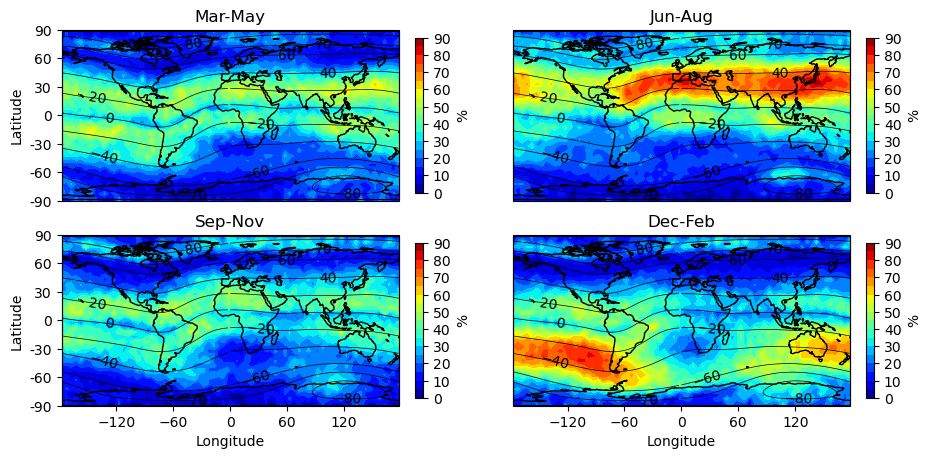

In [4]:
#Lat-Lon Plots

# Average over all altitudes
spr_ocfr_lon_altmean = spr_ocfr_lon.mean(dim='altitude')
sum_ocfr_lon_altmean = sum_ocfr_lon.mean(dim='altitude')
aut_ocfr_lon_altmean = aut_ocfr_lon.mean(dim='altitude')
win_ocfr_lon_altmean = win_ocfr_lon.mean(dim='altitude')


# Define common colorbar properties
vmin = 0
vmax = 90
cmap = plt.get_cmap('jet')

# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True,
                         subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

# Define season names
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

subplots = [spr_ocfr_lon_altmean, sum_ocfr_lon_altmean, aut_ocfr_lon_altmean, win_ocfr_lon_altmean]
season = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Plot the data
    C = ax.contourf(spr_lon, spr_lat, data, cmap=cmap,
                    levels=np.linspace(vmin, vmax, 19), vmin=vmin, vmax=vmax
                   )

    if row == 1:
        ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
        ax.set_xlabel('Longitude')
    if col == 0:
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        

    cbar = fig.colorbar(C, ax=ax, pad=0.04, shrink=0.8)
    cbar.set_label(r'%') 
        
    ax.coastlines() 
    

    ax.set_title(season[i])
    


    # Add contour lines to each subplot individually
    ax2 = fig.add_subplot(axes[row, col].get_subplotspec(), projection=ccrs.PlateCarree())
    
    ax2.set_global()
    contour_levels = [-80, -70, -60, -40, -20, 0, 20, 40, 60, 70, 80]
    contour = ax2.contour(ALon, ALat, ALATM[0, :, :],
                          transform=ccrs.PlateCarree(),
                          colors='black',
                          levels=contour_levels, vmin=-90, vmax=90,
                          linestyles='solid',
                          linewidths=0.5
                          )
    
    ax2.patch.set_facecolor('none')
    clabels = ax2.clabel(contour, inline=True, fontsize=10) 

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

# Save the figure
figname = f'ocfr_lon_mean_Lat_vs_Lon_5d_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/COSMIC/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()

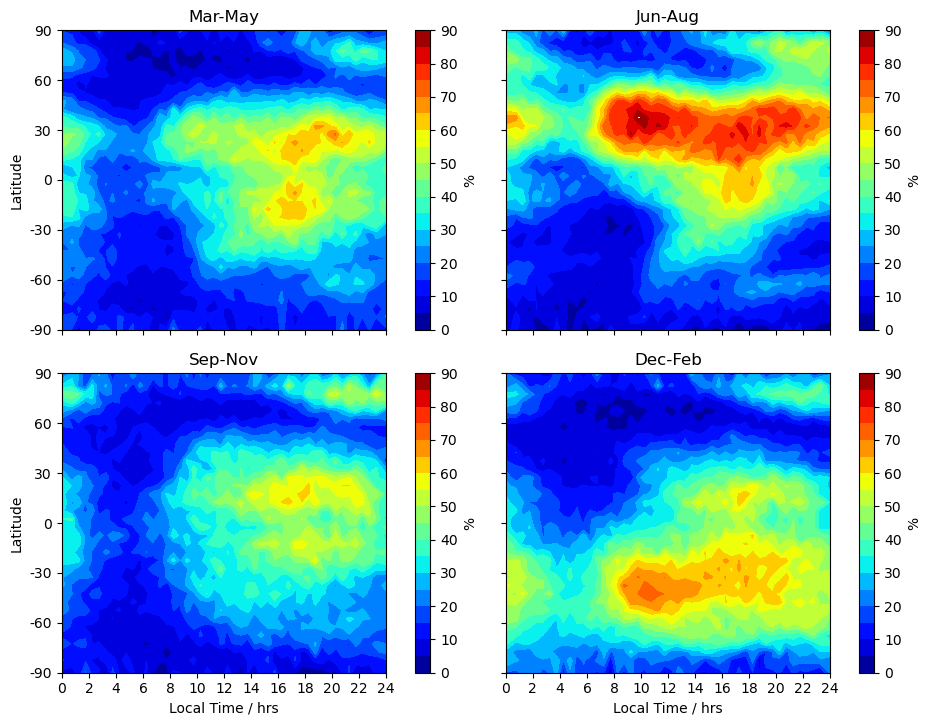

In [5]:
#Lat-LT Plots - all alts

timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

#-------------------------------------------------------------------------

spr_ocfr_LT_altmean = spr_ocfr_LT.mean(dim='altitude')
sum_ocfr_LT_altmean = sum_ocfr_LT.mean(dim='altitude')
aut_ocfr_LT_altmean = aut_ocfr_LT.mean(dim='altitude')
win_ocfr_LT_altmean = win_ocfr_LT.mean(dim='altitude')

#-----------------------------------------------------

    
# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 90
cmap = plt.get_cmap('jet')
# Plot the data in each subplot
subplots = [spr_ocfr_LT_altmean, sum_ocfr_LT_altmean, aut_ocfr_LT_altmean, win_ocfr_LT_altmean]
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    C = ax.contourf(spr_local_time_plot, spr_lat, data, cmap=jet
                    , levels=np.linspace(vmin, vmax, 19), vmin=vmin, vmax=vmax
                   )
    
    if row == 1:
        ax.set_xlabel('Local Time / hrs')
    if col == 0:
        ax.set_ylabel('Latitude')
        ax.set_yticks(np.linspace(-90, 90, 7))
        ax.set_yticklabels((-90, -60, -30, 0, 30, 60, 90))
        
    xticks = np.linspace(0, 24, 13)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks.astype(int))

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')
    
    ax.set_title(titles[i])

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

cbar.set_label(r'%')

figname = f'ocfr_LT_mean_Lat_vs_LT_5d_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/COSMIC/' + str(figname), dpi=400, bbox_inches='tight')
plt.show()

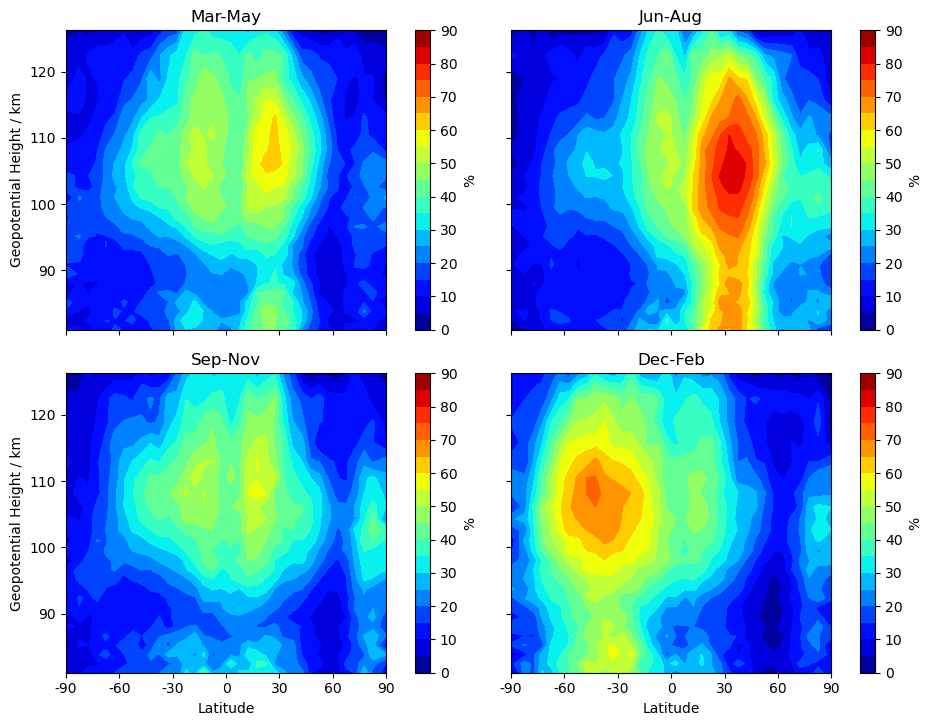

In [6]:
#Alt-Lat plots

spr_ocfr_LT_LTmean = spr_ocfr_LT.mean(dim='local_time')
sum_ocfr_LT_LTmean = sum_ocfr_LT.mean(dim='local_time')
aut_ocfr_LT_LTmean = aut_ocfr_LT.mean(dim='local_time')
win_ocfr_LT_LTmean = win_ocfr_LT.mean(dim='local_time')

#--------------------Dataset avg over all heights (lev,lat)-----------------------------------------
#-----------------------------------Lat-LT----------------------------------------------------------
#---------------------------------------------------------------------


# Create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 90
cmap = plt.get_cmap('jet')
# Plot the data in each subplot
subplots = [spr_ocfr_LT_LTmean, sum_ocfr_LT_LTmean, aut_ocfr_LT_LTmean, win_ocfr_LT_LTmean]
titles = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

for i, data in enumerate(subplots):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    C = ax.contourf(spr_lat_plot, spr_alt, data, cmap=jet
                    , levels=np.linspace(vmin, vmax, 19), vmin=vmin, vmax=vmax)
    
    if row == 1:
        ax.set_xlabel('Latitude')
        ax.set_xticks(np.linspace(-90, 90, 7))
        ax.set_xticklabels((-90, -60, -30, 0, 30, 60, 90))
    if col == 0:
        ax.set_ylabel('Geopotential Height / km')
        ax.set_ylim(spr_alt.min(),spr_alt.max())
        
    #ax.set_xticks(np.linspace(-90, 90, 7))
    #ax.set_xticklabels(xticks.astype(int))

    cbar = fig.colorbar(C, ax=ax, pad=0.07)
    cbar.set_label(r'%')
    
    ax.set_title(titles[i])

plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

cbar.set_label(r'%')

figname = f'ocfr_LT_mean_Alt_vs_Lat_5d_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/COSMIC/' + str(figname), dpi=400, bbox_inches='tight')

In [7]:
#Alt-LT plots, individual Lat slices


# Define the latitude slices
#latitude_slices = [(10, 15), (20, 25), (30, 35), (40, 45), (50, 55)]
latitude_slices = [(15,20) , (45, 50) ]

# Calculate the number of latitude slices
nlatsl = len(latitude_slices)
# Extract min and max values from the latitude slices
latslmin = min(min(lat_min, lat_max) for lat_min, lat_max in latitude_slices)
latslmax = max(max(lat_min, lat_max) for lat_min, lat_max in latitude_slices)




# Create new variables for each season and latitude slice
spr_ocfr_LT_latsl = {}
sum_ocfr_LT_latsl = {}
aut_ocfr_LT_latsl = {}
win_ocfr_LT_latsl = {}

# Loop through each latitude slice
for lat_slice in latitude_slices:
    lower_lat, upper_lat = lat_slice
    
    # Slice the data for the current latitude slice
    spr_slice = spr_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    sum_slice = sum_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    aut_slice = aut_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    win_slice = win_ocfr_LT.sel(latitude=slice(lower_lat, upper_lat))
    
    # Calculate the mean along the 'latitude' dimension
    spr_latslmean = spr_slice.mean(dim='latitude')
    sum_latslmean = sum_slice.mean(dim='latitude')
    aut_latslmean = aut_slice.mean(dim='latitude')
    win_latslmean = win_slice.mean(dim='latitude')
    
    # Store the results in dictionaries
    spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = spr_latslmean
    sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = sum_latslmean
    aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = aut_latslmean
    win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}'] = win_latslmean


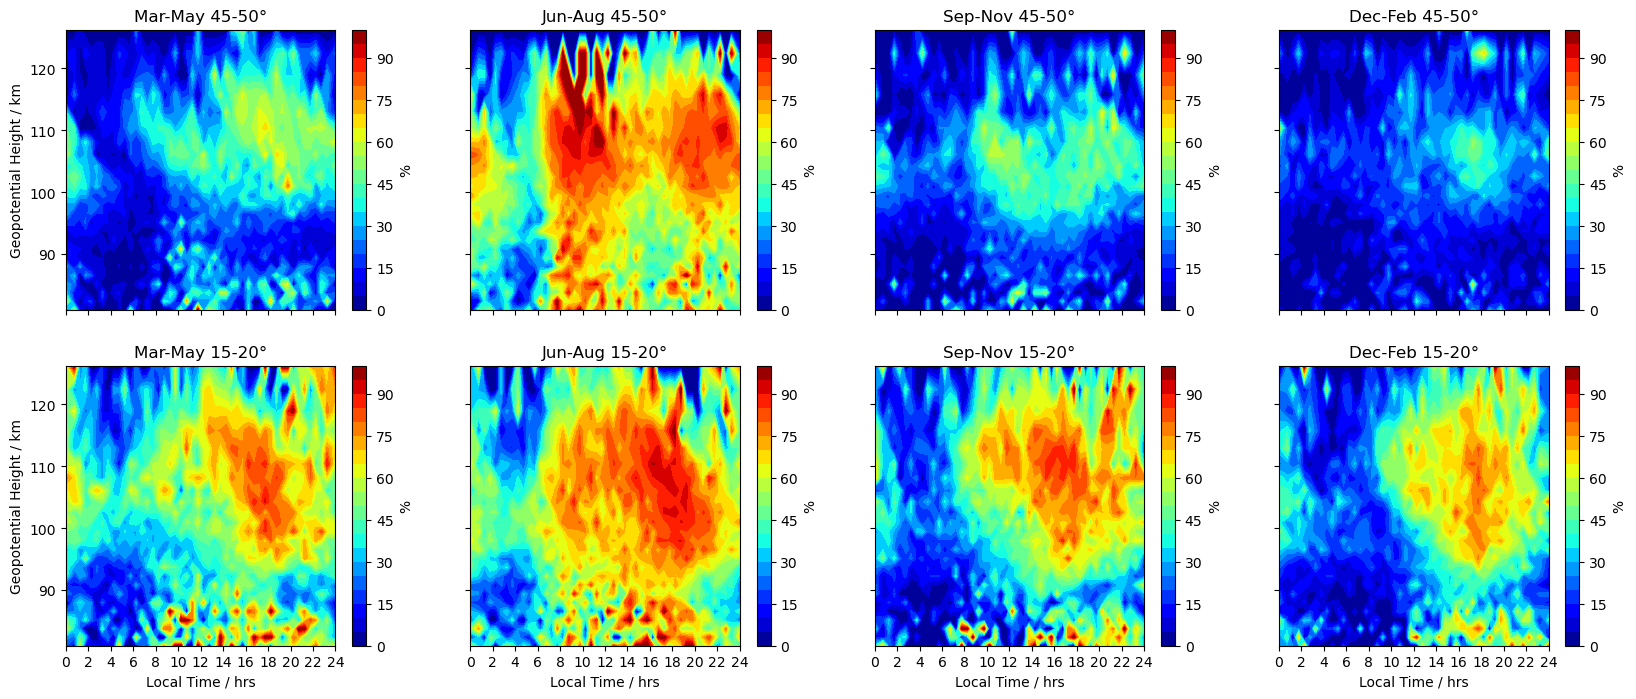

In [8]:
#Alt-LT plots, individual Lat slices

# Assuming you have defined your other variables as well, 
#e.g., Zavg_sl, 

timeplot = np.linspace(0, 24, 49)
timeconv_plot_ticks = np.arange(0,25, dtype=float)

# Define the seasons and titles
seasons = ['Mar-May', 'Jun-Aug', 'Sep-Nov', 'Dec-Feb']

# Create a 5xN subplot grid, where N is the number of seasons
num_seasons = len(seasons)
fig, axes = plt.subplots(nrows=nlatsl, ncols=num_seasons, figsize=(20, 4*nlatsl), sharex=True, sharey=True)

# Set common colorbar properties
vmin = 0
vmax = 100
cmap = plt.get_cmap('jet')

#plt.tight_layout(rect=[0.05, 0.03, 1, 0.95])

for i_season, season in enumerate(seasons):
    for i_lat_band, (lower_lat, upper_lat) in enumerate(latitude_slices[::-1]):
        lat_plot_str1 = str(lower_lat)
        lat_plot_str2 = str(upper_lat)

        # Extract the data for the current season and latitude band
        if season == 'Mar-May':
            data = spr_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
        elif season == 'Jun-Aug':
            data = sum_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
        elif season == 'Sep-Nov':
            data = aut_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']
        elif season == 'Dec-Feb':
            data = win_ocfr_LT_latsl[f'{lower_lat}-{upper_lat}']

        # Create subplots for each latitude band within the current season
        ax = axes[i_lat_band, i_season]

        C = ax.contourf(spr_local_time_plot, spr_alt, data, cmap=jet
                        , levels=np.linspace(vmin, vmax, 21), vmin=vmin, vmax=vmax)

        if i_lat_band == (nlatsl-1):
            ax.set_xlabel('Local Time / hrs')
            xticks = np.linspace(0, 24, 13)
            ax.set_xticks(xticks)
            ax.set_xticklabels(xticks.astype(int))

        if i_season == 0:
            ax.set_ylabel('Geopotential Height / km')
            ax.set_ylim(spr_alt.min(),spr_alt.max())

        cbar = fig.colorbar(C, ax=ax)#, pad=0.07)
        cbar.set_label(r'%')

        ax.set_title(f'{season} {lat_plot_str1}-{lat_plot_str2}\u00b0')



figname = f'ocfr_LT_mean_Alt_vs_LT_5d_latsl_{latslmin}-{latslmax}_x{nlatsl}_s4max_{s4max_threshold}.png'
plt.savefig('./Figures/COSMIC/' + str(figname), dpi=400, bbox_inches='tight')

plt.show()